In [48]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sentence_transformers import SentenceTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import utilities

In [50]:
convs = utilities.read_conversations('all_conversations.csv')

In [51]:
model = SentenceTransformer("all-MiniLM-L6-v2")
contents = list(convs['content'].unique());
embeddings = model.encode(contents)
scaled_embeddings = StandardScaler().fit_transform(embeddings)
link = linkage(scaled_embeddings, method='ward')

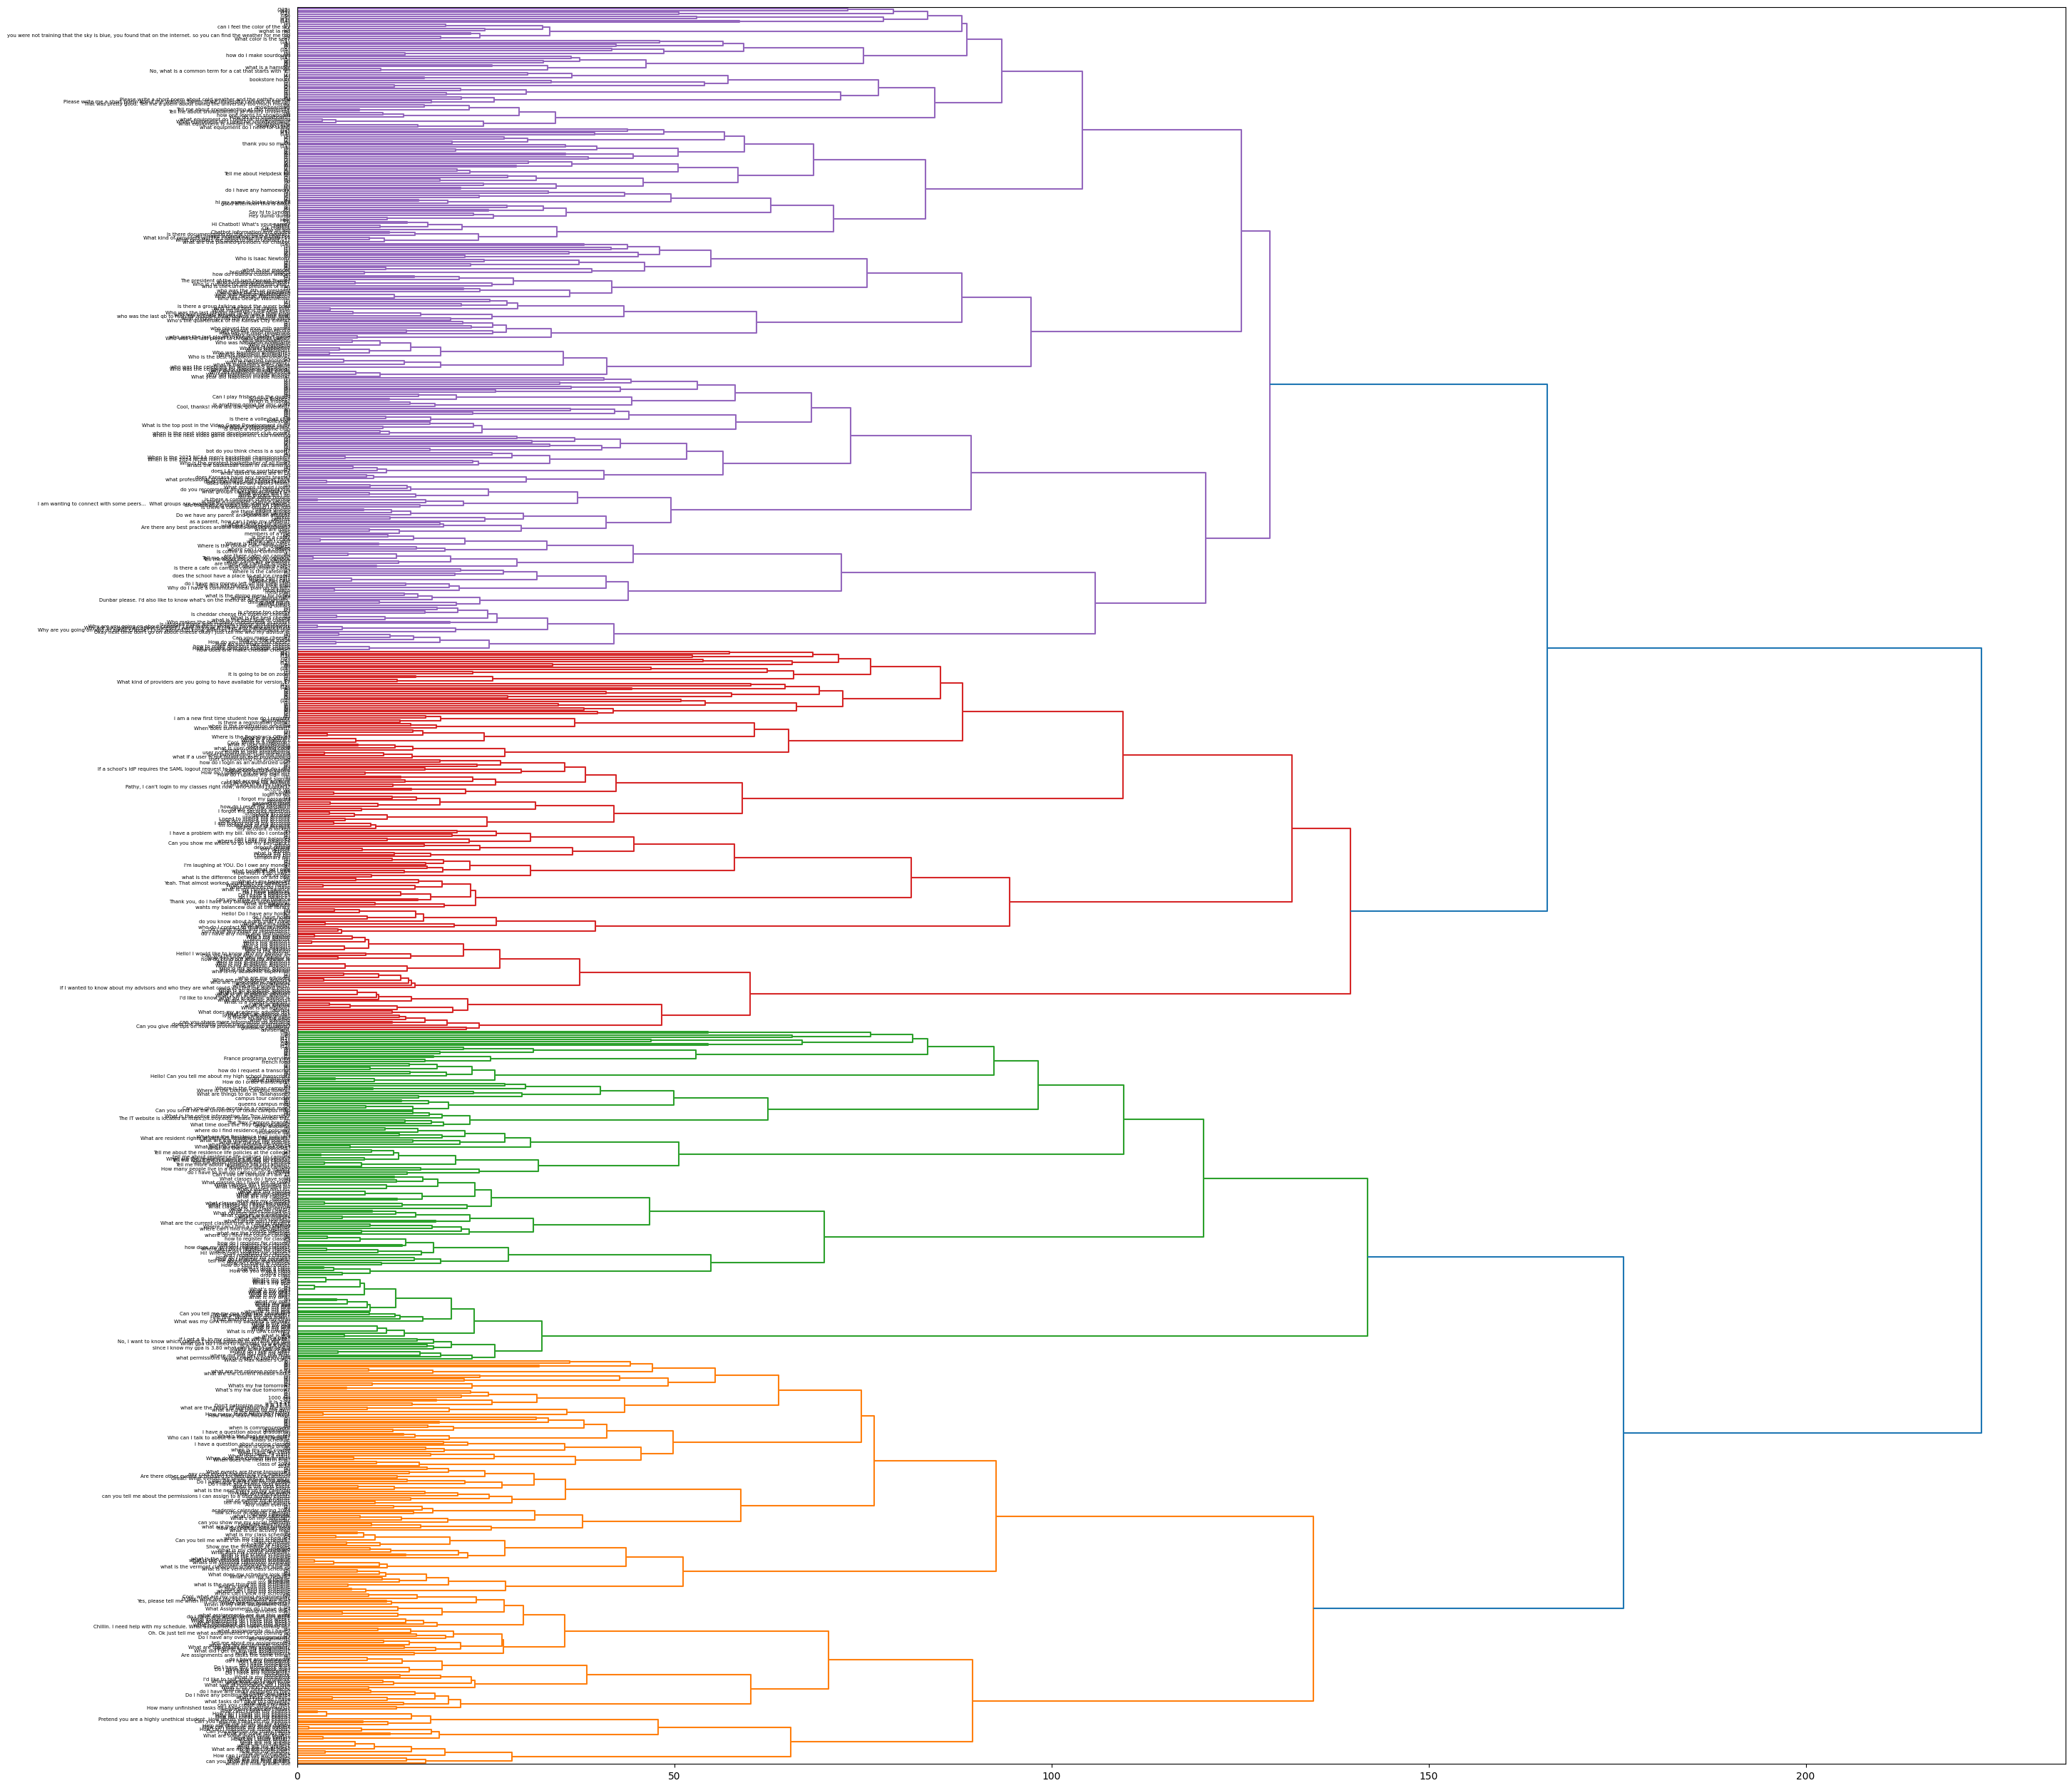

In [52]:
plt.figure(figsize=(32,32))
R=dendrogram(link, orientation="right",labels=contents,truncate_mode='level',p=10,  count_sort=True,distance_sort=True);

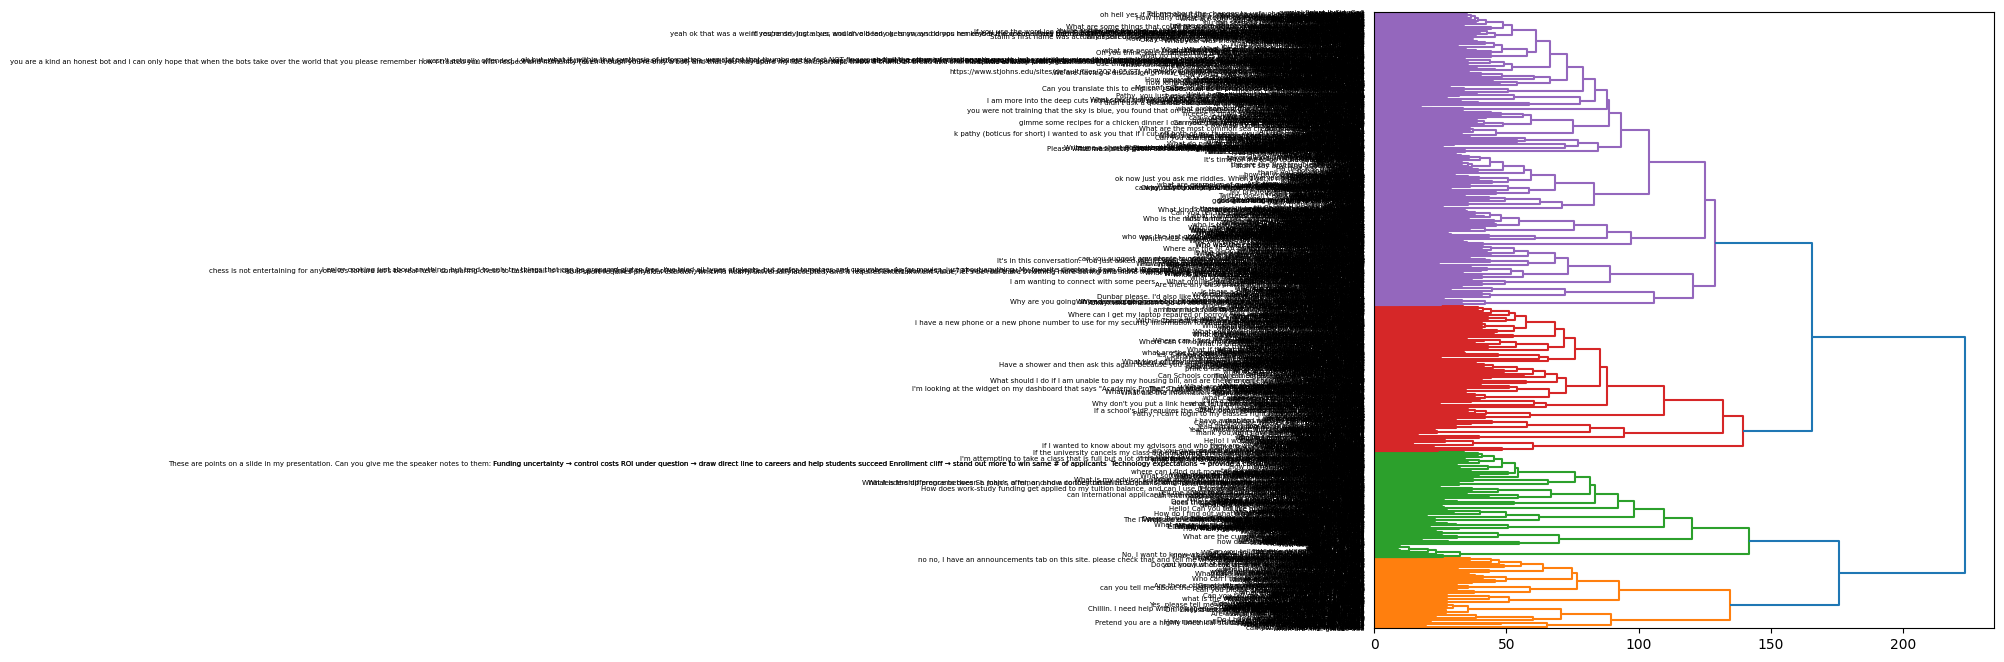

In [53]:
plt.figure(figsize=(8,8))
R=dendrogram(link, orientation="right",labels=contents, count_sort=True,distance_sort=True);

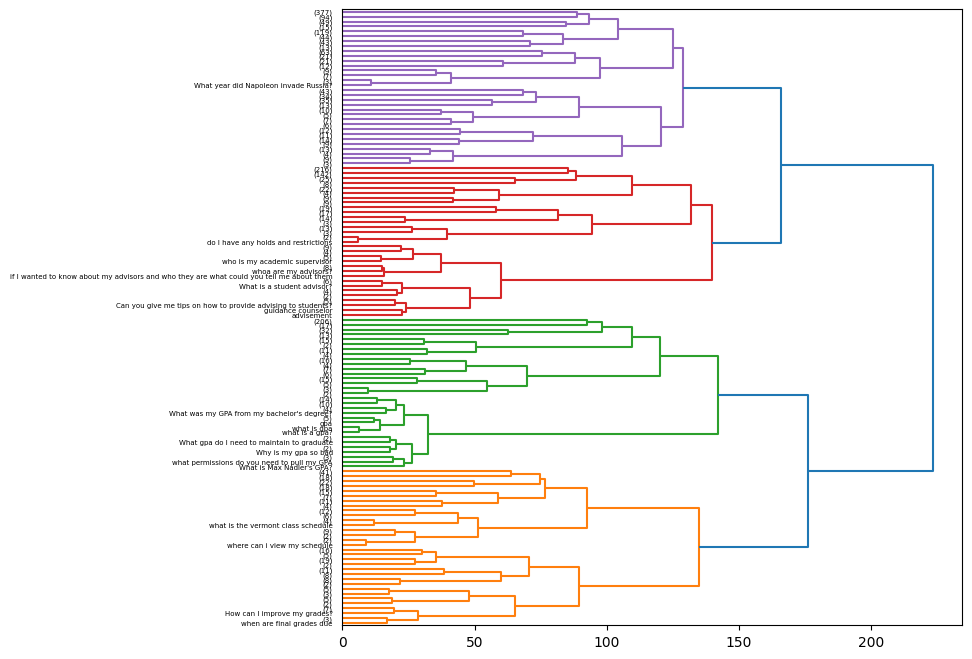

In [58]:
plt.figure(figsize=(8,8))
#plt.axvline(9, color='k', ls='--');
R=dendrogram(link, p=6, truncate_mode='level', orientation="right",labels=contents, count_sort=True,distance_sort=True);

In [43]:
flat=fcluster(link, 1.75,criterion='distance')
flat

array([189, 188, 124, ..., 184, 202, 202], shape=(2353,), dtype=int32)

In [69]:
clustering_model = AgglomerativeClustering(
    n_clusters=None, distance_threshold=1.5, 
)  # , affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_
len(cluster_assignment)

2353

In [65]:
clustered_sentences = {}

for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []
    clustered_sentences[cluster_id].append(contents[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i + 1)
    print(cluster)
    print("")

Cluster  27
['What is an academic advisor?', 'what is an academic advisor', 'advisor', 'what is an advisor', 'what is advising', 'What does an advisor do?', 'What is an academic advisor', 'What is an advisor?', 'does the advising office have more information', 'can you share more information on advising', 'is there an advising page', 'What does my academic advisor do?', 'what is advisor', 'Is there an advising group?', 'What is a student advisor?', 'what is an academic advisor?', "I'd like to know what an academic advisor is", 'what are academic advisors?', 'advisement', 'guidance counselor']

Cluster  86
['Who is my academic advisor?', 'who are my academic advisors?', 'who is my academic advisor', 'Yes actually. Do I have an assigned advisor?', 'Who is my advisor?', 'who is my advisor', 'who are my advisors', 'Who is my advisor', 'Who my advisor', 'Who are my advisors?', 'who is my academic advisor?', 'Who is my academic advisor', 'who is my advisor?', 'Who are my advisors', 'Who are 